In [1]:
import skeliner as sk

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [2]:
MESH_PATH = "../data/720575940545220339.obj"
mesh = sk.io.load_mesh(MESH_PATH)

In [3]:
skel = sk.skeletonize(mesh, 
    detect_soma=True,
    split_elongated_shells=True,
    # --- post-processing parameters ---
    collapse_soma=True, 
    bridge_gaps=True, 
    prune_tiny_neurites=True, 
    verbose=True,
)

[skeliner] starting skeletonisation (636684 vertices, 1274227 faces)
 ↳  build surface graph                          … 3.23 s
 ↳  bin surface vertices by geodesic distance    … 4.48 s
 ↳  compute bin centroids and radii              … 4.76 s
 ↳  post-skeletonization soma detection          … 0.15 s
      └─ Found soma at [951838.1, 1088264.5, 33830.8] (r=3822.27) 
 ↳  map mesh faces to skeleton edges             … 0.52 s
 ↳  merge redundant near-soma nodes              … 0.45 s
      └─ 124 nodes merged into soma
      └─ Moved soma to [951508.1, 1086073.0, 34253.8] (r=8368.3)
 ↳  bridge skeleton gaps                         … 0.16 s
 ↳  build global minimum-spanning tree           … 0.10 s
 ↳  prune tiny neurites                          … 0.31 s
      └─ Pruned 47 nodes and 47 edges.
TOTAL (soma + core + post)                       … 14.17 s (0.15 + 12.83 + 1.19)
(10,807 nodes, 10,806 edges)


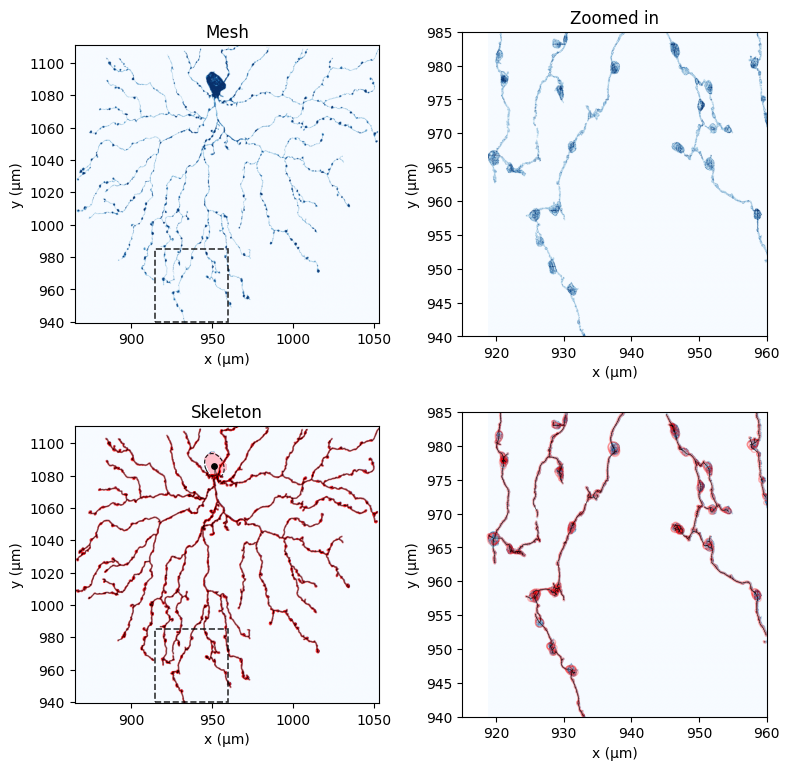

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
sk.plot2d(
    skel, mesh,
    plane="xy",
    scale=1e-3, # nm → µm 
    unit="µm",
    draw_skel=False,
    draw_edges=False,
    draw_soma_mask=False,
    ax=ax[0, 0]
)
sk.plot2d(
    skel, mesh,
    plane="xy",
    scale=1e-3, # nm → µm 
    unit="µm",
    draw_edges=True,
    draw_soma_mask=True,
    ax=ax[1, 0]
)

x0, x1 = (915, 960)
y0, y1 = (940, 985)
sk.plot2d(
    skel, mesh,
    plane="xy",
    scale=1e-3,  
    unit="µm",
    xlim=(x0, x1),
    ylim=(y0, y1),
    draw_skel=False,
    draw_edges=False,
    ax=ax[0, 1],
)
sk.plot2d(
    skel, mesh,
    plane="xy",
    scale=1e-3,  
    unit="µm",
    xlim=(x0, x1),
    ylim=(y0, y1),
    radius_metric = "mean",
    draw_edges=True,
    ax=ax[1, 1],
)
ax[0, 0].set_title("Mesh")
ax[1, 0].set_title("Skeleton")
ax[0, 1].set_title("Zoomed in")

rect = [Rectangle(
    (x0, y0),          # lower-left corner
    x1-x0, y1-y0,
    linewidth=1.2,
    edgecolor="black",
    linestyle="--",
    facecolor="none",
    alpha=0.8,
    zorder=3,          # above background & edges, below nodes
) for _ in range(2)]
ax[0, 0].add_patch(rect[0])
ax[1, 0].add_patch(rect[1])

for a in ax.flatten():
    a.set_aspect("equal")
    
fig.tight_layout()

(<Figure size 600x600 with 3 Axes>,
 {'B': <Axes: label='B', ylabel='z (µm)'>,
  'A': <Axes: label='A', xlabel='x (µm)', ylabel='y (µm)'>,
  'C': <Axes: label='C', xlabel='z (µm)'>})

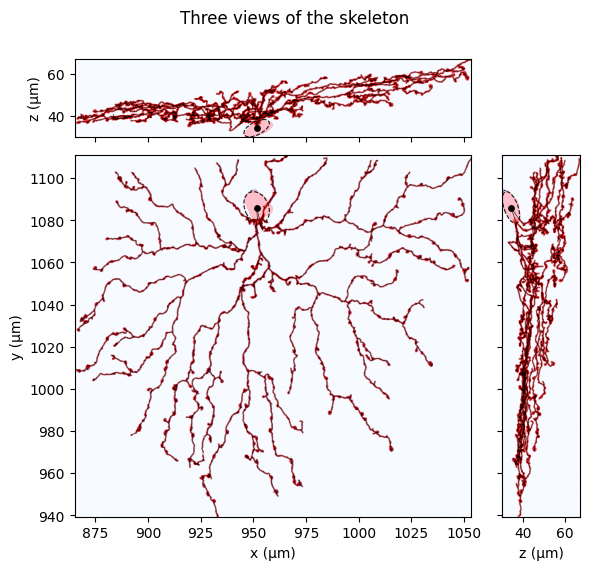

In [5]:
sk.plot3v(skel, mesh, scale=1e-3, unit="µm", planes=["xy", "xz", "zy"], 
          title="Three views of the skeleton",
          figsize=(6, 6))

In [6]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark

Last updated: 2025-05-25 18:05:24CEST

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 9.2.0

matplotlib: 3.10.3
skeliner  : 0.1.0

Watermark: 2.5.0

